In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
products = [] #List to store names of the products
prices = [] #List to store prices of the products
ratings = [] #List to store ratings of the products


In [5]:
sp = requests.get("https://www.jumia.co.ke/samsung-galaxy-a14-4g-6.6-64gb-4gb-ram-dual-sim-5000mah-silver-124119599.html")

In [6]:
sp = BeautifulSoup(sp.content, 'html.parser')

In [7]:
for each in sp.find_all('a', href=True,
attrs={'class':'btn _def _i _rnd -mas -fsh0 -me-start'}):
    name = each.find('div',
attrs={'class':'-fs20 -pts -pbxs'})
    price= each.find('div',
attrs={'class':'-hr -mtxs -pvs'})
    rate=each.find('div',
attrs={'class':'-df -i-ctr -pbs'})



In [13]:
if name is None:
    products.append(None)
else:
    products.append(name.text)
if price is None:
    prices.append(None)
else:
    prices.append(price.text)
if rate is None:
    ratings.append(None)
else:
    ratings.append(rate.text)

In [14]:
df = pd.DataFrame({'Product Name':products,'Price': prices, 'Ratings': ratings})
print(df.to_string())

  Product Name Price Ratings
0         None  None    None


In [15]:
df.to_csv('products.csv', index = False)

Text(0.5, 1.0, 'Rating against price')

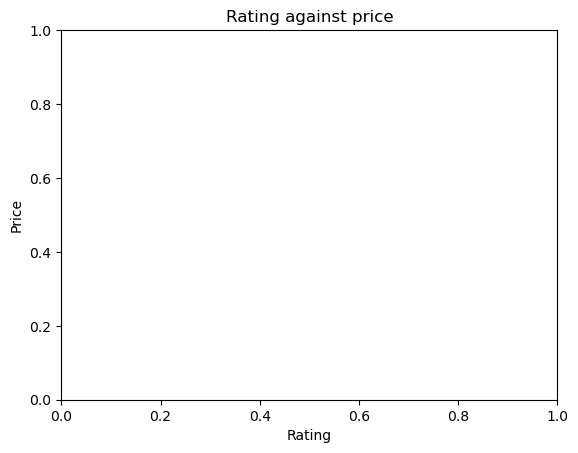

In [16]:
df2 = pd.read_csv("products.csv")

plt.xlabel("Rating")
plt.ylabel("Price")
plt.title("Rating against price")



In [18]:
plt.scatter(df2.Rating, df2.Price, marker="*", c='purple', alpha=1)
# marker: format can be 0 or *, c:color, alpha:opacity (Range: 0-1)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Rating'